In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import numpy as np

In [2]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

#for model evaluation
from sklearn.metrics import roc_curve, auc 
from matplotlib import pyplot

In [3]:
orig_df = pd.read_csv('Imputed_Data.csv')

# set the max columns to none
pd.set_option('display.max_columns', None)

orig_df.head()

,Unnamed: 0,group,ID,outcome,age,gendera,BMI,hypertensive,atrialfibrillation,CHD with no MI,diabetes,deficiencyanemias,depression,Hyperlipemia,Renal failure,COPD,heart rate,Systolic blood pressure,Diastolic blood pressure,Respiratory rate,temperature,SP O2,Urine output,hematocrit,RBC,MCH,MCHC,MCV,RDW,Leucocyte,Platelets,Neutrophils,Basophils,Lymphocyte,PT,INR,NT-proBNP,Creatine kinase,Creatinine,Urea nitrogen,glucose,Blood potassium,Blood sodium,Blood calcium,Chloride,Anion gap,Magnesium ion,PH,Bicarbonate,Lactic acid,PCO2,EF,Comorbidities
0,0,1,125047,0.0,72,1,37.588179,0,0,0,1,1,0,1,1,0,68.837838,155.866667,68.333333,16.621622,36.714286,98.394737,2155.0,26.272727,2.960000,28.250000,31.520000,89.900,16.220000,7.650000,305.100,74.650000,0.400000,13.300000,10.600000,1.000000,1956.0,148.000000,1.958333,50.000000,114.636364,4.816667,138.750000,7.463636,109.166667,13.166667,2.618182,7.230,21.166667,0.5,40.0,55,4.0
1,1,1,139812,0.0,75,2,30.188278,0,0,0,0,1,0,0,0,1,101.370370,140.000000,65.000000,20.851852,36.682540,96.923077,1425.0,30.780000,3.138000,31.060000,31.660000,98.200,14.260000,12.740000,246.400,80.115592,0.405685,12.232717,17.486404,1.626064,2384.0,60.600000,1.122222,20.333333,147.500000,4.450000,138.888889,8.162500,98.444444,11.444444,1.887500,7.225,33.444444,0.5,78.0,55,2.0
2,2,1,109787,0.0,83,2,26.572634,0,0,0,0,1,0,0,1,0,72.318182,135.333333,61.375000,23.640000,36.453704,95.291667,2425.0,27.700000,2.620000,34.320000,31.300000,109.800,23.820000,5.480000,204.200,68.100000,0.550000,24.500000,11.275000,0.950000,4081.0,16.000000,1.871429,33.857143,149.000000,5.825000,140.714286,8.266667,105.857143,10.000000,2.157143,7.268,30.571429,0.5,71.5,35,2.0
3,3,1,130587,0.0,43,2,83.264629,0,0,0,0,0,0,0,0,0,94.500000,126.400000,73.200000,21.857143,36.287037,93.846154,8760.0,36.637500,4.277500,26.062500,30.412500,85.625,17.037500,8.225000,216.375,81.800000,0.150000,14.500000,27.066667,2.666667,668.0,85.000000,0.585714,15.285714,128.250000,4.386667,138.500000,9.476923,92.071429,12.357143,1.942857,7.370,38.571429,0.6,75.0,55,0.0
4,4,1,138290,0.0,75,2,31.824842,1,0,0,0,1,0,0,1,1,67.920000,156.560000,58.120000,21.360000,36.761905,99.280000,4455.0,29.933333,3.286667,30.666667,33.666667,91.000,16.266667,8.833333,251.000,80.115592,0.405685,12.232717,17.486404,1.626064,30802.0,111.666667,1.950000,43.000000,145.750000,4.783333,136.666667,8.733333,104.500000,15.166667,1.650000,7.250,22.000000,0.6,50.0,55,4.0


In [4]:
orig_df.columns

Index(['Unnamed: 0', 'group', 'ID', 'outcome', 'age', 'gendera', 'BMI',
       'hypertensive', 'atrialfibrillation', 'CHD with no MI', 'diabetes',
       'deficiencyanemias', 'depression', 'Hyperlipemia', 'Renal failure',
       'COPD', 'heart rate', 'Systolic blood pressure',
       'Diastolic blood pressure', 'Respiratory rate', 'temperature', 'SP O2',
       'Urine output', 'hematocrit', 'RBC', 'MCH', 'MCHC', 'MCV', 'RDW',
       'Leucocyte', 'Platelets', 'Neutrophils', 'Basophils', 'Lymphocyte',
       'PT', 'INR', 'NT-proBNP', 'Creatine kinase', 'Creatinine',
       'Urea nitrogen', 'glucose', 'Blood potassium', 'Blood sodium',
       'Blood calcium', 'Chloride', 'Anion gap', 'Magnesium ion', 'PH',
       'Bicarbonate', 'Lactic acid', 'PCO2', 'EF', 'Comorbidities'],
      dtype='object')

In [5]:
df = orig_df[['outcome', 'age', 'Urine output', 'RDW',
       'Leucocyte', 'Lymphocyte', 'Urea nitrogen', 'Blood calcium', 'Anion gap',
       'Bicarbonate', 'Lactic acid', 'INR']].copy()
df.head()

,outcome,age,Urine output,RDW,Leucocyte,Lymphocyte,Urea nitrogen,Blood calcium,Anion gap,Bicarbonate,Lactic acid,INR
0,0.0,72,2155.0,16.220000,7.650000,13.300000,50.000000,7.463636,13.166667,21.166667,0.5,1.000000
1,0.0,75,1425.0,14.260000,12.740000,12.232717,20.333333,8.162500,11.444444,33.444444,0.5,1.626064
2,0.0,83,2425.0,23.820000,5.480000,24.500000,33.857143,8.266667,10.000000,30.571429,0.5,0.950000
3,0.0,43,8760.0,17.037500,8.225000,14.500000,15.285714,9.476923,12.357143,38.571429,0.6,2.666667
4,0.0,75,4455.0,16.266667,8.833333,12.232717,43.000000,8.733333,15.166667,22.000000,0.6,1.626064


In [6]:
# Create our features
X = df.drop('outcome', axis=1)
y = df['outcome']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [8]:
print("Shape of X_train:" ,X_train.shape)
print("Shape of y_train:" ,y_train.shape)
print("Shape of X_test:"  ,X_test.shape)
print("Shape of y_test:"  ,y_test.shape)

Shape of X_train: (882, 11)
Shape of y_train: (882,)
Shape of X_test: (294, 11)
Shape of y_test: (294,)


In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Logistic Regression Model

In [10]:
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression(solver='lbfgs', max_iter=200, random_state=1)
lrm.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

In [11]:
# Calculated the balanced accuracy score
y_pred_lrm = lrm.predict(X_test)
balanced_accuracy_score(y_test, y_pred_lrm)

0.6074666030534351

In [12]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred_lrm)

array([[261,   1],
       [ 25,   7]], dtype=int64)

In [13]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_lrm))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.91      1.00      0.22      0.95      0.47      0.23       262
        1.0       0.88      0.22      1.00      0.35      0.47      0.20        32

avg / total       0.91      0.91      0.30      0.89      0.47      0.23       294



In [14]:
importances = pd.DataFrame(data={
    'Feature': X.columns,
    'Importance': lrm.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)
print(importances)

          Feature  Importance
9     Lactic acid    0.344868
5   Urea nitrogen    0.322450
3       Leucocyte    0.227254
7       Anion gap    0.196981
10            INR    0.192923
2             RDW    0.184655
0             age    0.060845
8     Bicarbonate   -0.040505
4      Lymphocyte   -0.197276
1    Urine output   -0.347685
6   Blood calcium   -0.383642


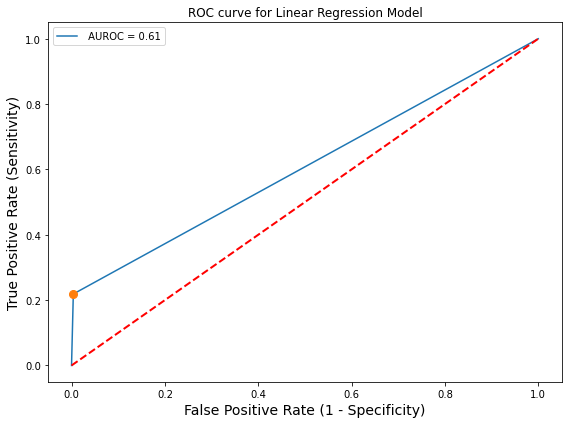

In [15]:
#roc-curve
fig, (ax2) = plt.subplots(figsize = (8,6))
fpr, tpr, thresholds_roc = roc_curve(y_test,y_pred_lrm)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Linear Regression Model')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

# Balanced Random Forest Classifier

In [16]:
# Resample the training data with the BalancedRandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
brf = BalancedRandomForestClassifier(n_estimators=200, random_state=1)
brf.fit(X_train, y_train) 

BalancedRandomForestClassifier(n_estimators=200, random_state=1)

In [17]:
# Calculated the balanced accuracy score
y_pred_brf = brf.predict(X_test)
balanced_accuracy_score(y_test, y_pred_brf)

0.7436784351145038

In [18]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred_brf)

array([[185,  77],
       [  7,  25]], dtype=int64)

In [19]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_brf))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.96      0.71      0.78      0.81      0.74      0.55       262
        1.0       0.25      0.78      0.71      0.37      0.74      0.56        32

avg / total       0.89      0.71      0.77      0.77      0.74      0.55       294



In [20]:
# List the features sorted in descending order by feature importance
sorted(zip(brf.feature_importances_, X.columns), reverse=True)

[(0.1319862035610162, 'Urine output'),
 (0.10561297208138193, 'Leucocyte'),
 (0.10223484611397408, 'Bicarbonate'),
 (0.09746069686377284, 'Anion gap'),
 (0.09253278793139429, 'Blood calcium'),
 (0.09016122609047948, 'Lactic acid'),
 (0.08969104584184409, 'RDW'),
 (0.08513846573183212, 'Lymphocyte'),
 (0.0848874312179789, 'Urea nitrogen'),
 (0.06704992577732653, 'INR'),
 (0.053244398788999676, 'age')]

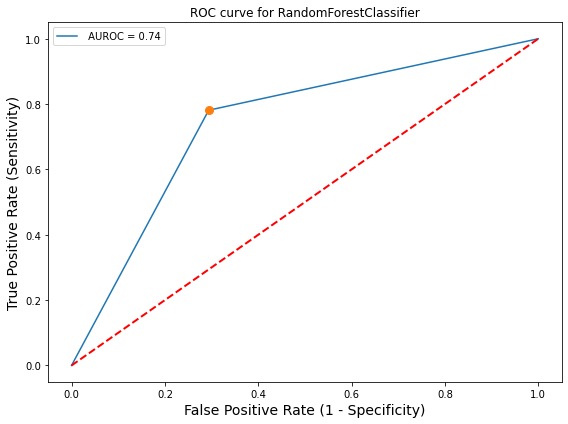

In [21]:
#roc-curve
fig, (ax2) = plt.subplots(figsize = (8,6))
fpr, tpr, thresholds_roc = roc_curve(y_test,y_pred_brf)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for RandomForestClassifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

# Easy Ensemble AdaBoost Classifier

In [22]:
# Train the EasyEnsembleClassifier
from imblearn.ensemble import EasyEnsembleClassifier
eec = EasyEnsembleClassifier(random_state=1)
eec.fit(X_train, y_train)

EasyEnsembleClassifier(random_state=1)

In [23]:
# Calculated the balanced accuracy score
y_pred_eec = eec.predict(X_test)
balanced_accuracy_score(y_test, y_pred_eec)

0.6838024809160306

In [24]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred_eec)

array([[170,  92],
       [  9,  23]], dtype=int64)

In [25]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_eec))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.95      0.65      0.72      0.77      0.68      0.46       262
        1.0       0.20      0.72      0.65      0.31      0.68      0.47        32

avg / total       0.87      0.66      0.71      0.72      0.68      0.46       294



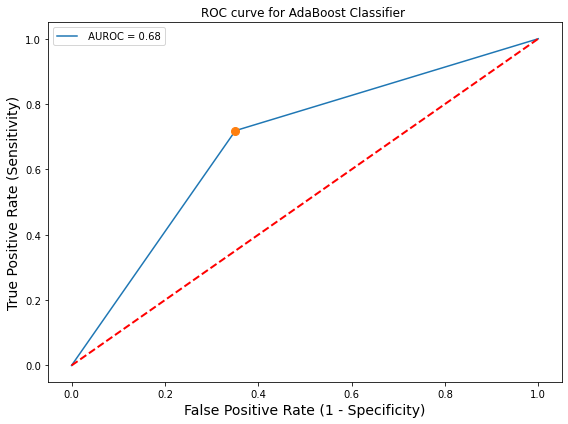

In [26]:
#roc-curve
fig, (ax2) = plt.subplots(figsize = (8,6))
fpr, tpr, thresholds_roc = roc_curve(y_test,y_pred_eec)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for AdaBoost Classifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

# XGB Classifier

In [27]:
from xgboost import XGBClassifier
from sklearn import metrics
# Creating model object
xgb = XGBClassifier(n_estimator=200, random_state=1)
xgb.fit(X_train, y_train)

[22:34:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimator=200,
              n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, ...)

In [28]:
# Calculated the balanced accuracy score
y_pred_xgb = xgb.predict(X_test)
balanced_accuracy_score(y_test, y_pred_xgb)

0.6196326335877862

In [29]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred_xgb)

array([[251,  11],
       [ 23,   9]], dtype=int64)

In [30]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_xgb))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.92      0.96      0.28      0.94      0.52      0.29       262
        1.0       0.45      0.28      0.96      0.35      0.52      0.25        32

avg / total       0.87      0.88      0.35      0.87      0.52      0.28       294



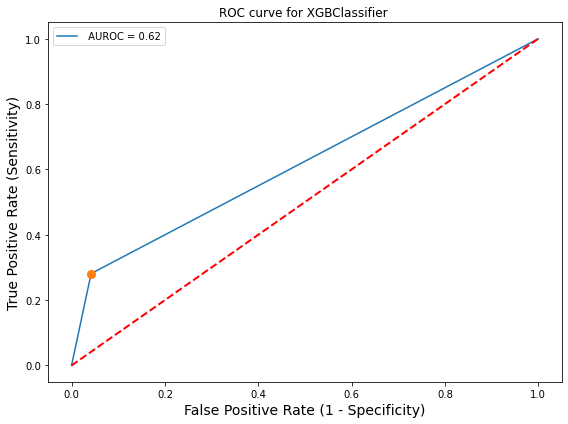

In [31]:
#roc-curve
fig, (ax2) = plt.subplots(figsize = (8,6))
fpr, tpr, thresholds_roc = roc_curve(y_test,y_pred_xgb)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for XGBClassifier ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

# Neural Network

In [32]:
import tensorflow as tf

# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 15
hidden_nodes_layer2 = 11
hidden_nodes_layer3 = 5

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                180       
                                                                 
 dense_1 (Dense)             (None, 11)                176       
                                                                 
 dense_2 (Dense)             (None, 5)                 60        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 422
Trainable params: 422
Non-trainable params: 0
_________________________________________________________________


In [33]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [34]:
# Train the model
fit_model = nn.fit(X_train, y_train,epochs=100)

Epoch 1/100
28/28 [==============================] - 1s 1ms/step - loss: 0.6900 - accuracy: 0.5147
Epoch 2/100
28/28 [==============================] - 0s 2ms/step - loss: 0.6334 - accuracy: 0.7948
Epoch 3/100
28/28 [==============================] - 0s 2ms/step - loss: 0.5650 - accuracy: 0.8617
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4978 - accuracy: 0.8628
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4508 - accuracy: 0.8583
Epoch 6/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8605
Epoch 7/100
28/28 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.8605
Epoch 8/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3902 - accuracy: 0.8628
Epoch 9/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3789 - accuracy: 0.8651
Epoch 10/100
28/28 [==============================] - 0s 2ms/step - loss: 0.3704 - accuracy: 0.8651
Epoch 11/

28/28 [==============================] - 0s 1ms/step - loss: 0.2291 - accuracy: 0.9127
Epoch 84/100
28/28 [==============================] - 0s 1ms/step - loss: 0.2270 - accuracy: 0.9127
Epoch 85/100
28/28 [==============================] - 0s 1ms/step - loss: 0.2263 - accuracy: 0.9127
Epoch 86/100
28/28 [==============================] - 0s 1ms/step - loss: 0.2252 - accuracy: 0.9127
Epoch 87/100
28/28 [==============================] - 0s 1ms/step - loss: 0.2245 - accuracy: 0.9138
Epoch 88/100
28/28 [==============================] - 0s 2ms/step - loss: 0.2228 - accuracy: 0.9161
Epoch 89/100
28/28 [==============================] - 0s 1ms/step - loss: 0.2232 - accuracy: 0.9138
Epoch 90/100
28/28 [==============================] - 0s 1ms/step - loss: 0.2223 - accuracy: 0.9138
Epoch 91/100
28/28 [==============================] - 0s 1ms/step - loss: 0.2211 - accuracy: 0.9138
Epoch 92/100
28/28 [==============================] - 0s 1ms/step - loss: 0.2195 - accuracy: 0.9184
Epoch 93/100


In [35]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test, y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

10/10 - 0s - loss: 0.3171 - accuracy: 0.8707 - 123ms/epoch - 12ms/step
Loss: 0.3170726001262665, Accuracy: 0.8707482814788818


# Support Vector Machines

In [37]:
from sklearn import svm
# Creating model object
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

In [38]:
# Calculated the balanced accuracy score
y_pred_clf = clf.predict(X_test)
balanced_accuracy_score(y_test, y_pred_clf)

0.5743082061068703

In [39]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred_clf)

array([[260,   2],
       [ 27,   5]], dtype=int64)

In [40]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_clf))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.91      0.99      0.16      0.95      0.39      0.17       262
        1.0       0.71      0.16      0.99      0.26      0.39      0.14        32

avg / total       0.89      0.90      0.25      0.87      0.39      0.17       294



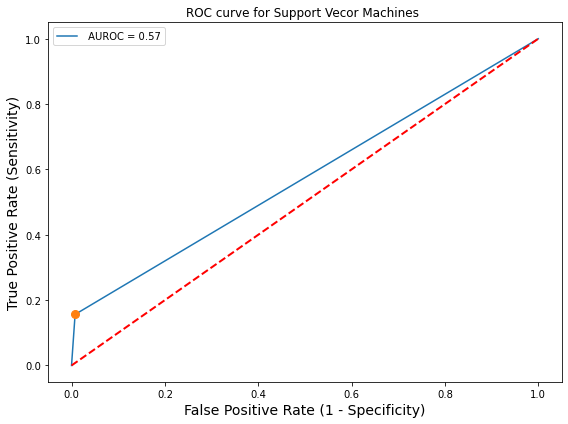

In [41]:
#roc-curve
fig, (ax2) = plt.subplots(figsize = (8,6))
fpr, tpr, thresholds_roc = roc_curve(y_test,y_pred_clf)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for Support Vecor Machines ')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()

# K Nearest Neighbors

In [61]:
from sklearn.neighbors import KNeighborsClassifier

KNeighborsClassifier(n_neighbors=11)

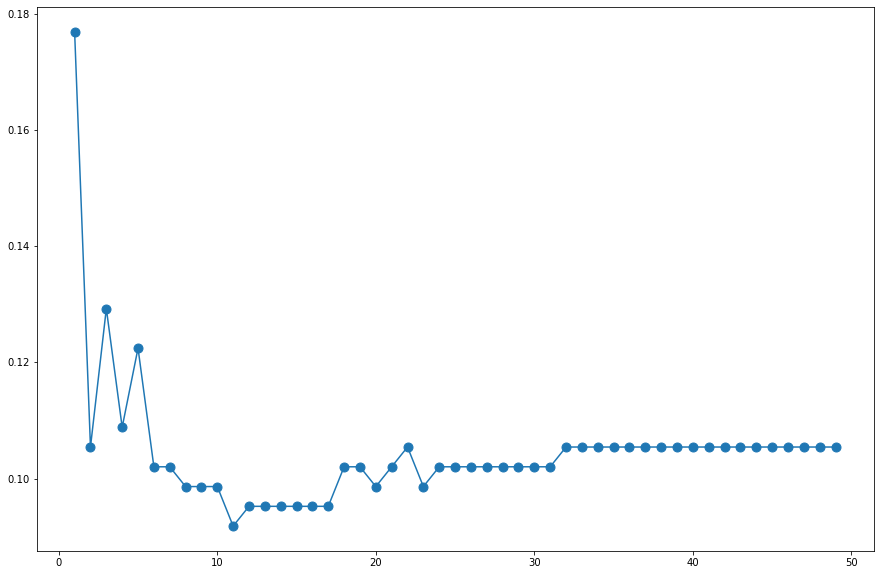

In [60]:
#determine optimal value of K
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)

In [62]:
# Calculated the balanced accuracy score
y_pred_knn = knn.predict(X_test)
balanced_accuracy_score(y_test, y_pred_knn)

0.5918416030534351

In [63]:
# Display the confusion matrix
confusion_matrix(y_test, y_pred_knn)

array([[261,   1],
       [ 26,   6]], dtype=int64)

In [64]:
# Print the imbalanced classification report
print(classification_report_imbalanced(y_test, y_pred_knn))

                   pre       rec       spe        f1       geo       iba       sup

        0.0       0.91      1.00      0.19      0.95      0.43      0.20       262
        1.0       0.86      0.19      1.00      0.31      0.43      0.17        32

avg / total       0.90      0.91      0.28      0.88      0.43      0.20       294



In [ ]:
#roc-curve
fig, (ax2) = plt.subplots(figsize = (8,6))
fpr, tpr, thresholds_roc = roc_curve(y_test,y_pred_knn)
roc_auc = auc(fpr,tpr)
ax2.plot(fpr,tpr, label = " AUROC = {:0.2f}".format(roc_auc))
ax2.plot([0,1], [0,1], 'r', linestyle = "--", lw = 2)
ax2.set_xlabel("False Positive Rate", fontsize = 14)
ax2.set_ylabel("True Positive Rate", fontsize = 14)
ax2.set_title("ROC Curve", fontsize = 18)
ax2.legend(loc = 'best')
plt.title('ROC curve for K Nearest Neighbors')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
        #find default threshold
close_default = np.argmin(np.abs(thresholds_roc - 0.5))
ax2.plot(fpr[close_default], tpr[close_default], 'o', markersize = 8)
plt.tight_layout()